In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings

In [3]:
data=pd.read_csv('wind_dataset.csv')
data

,Date,Wind_Speed(m/s),Temperature(C),Humidity(%),Power_Output(kW)
0,2013-01-01,3.69,23.45,66.15,60.429057
1,2013-01-02,3.10,22.50,57.25,35.992715
2,2013-01-03,2.77,22.66,59.36,25.657505
3,2013-01-04,2.77,24.19,61.64,25.503745
4,2013-01-05,2.86,24.48,60.59,28.043921
...,...,...,...,...,...
4012,2023-12-27,4.18,21.10,65.59,88.631550
4013,2023-12-28,4.59,21.81,71.73,116.968883
4014,2023-12-29,4.56,22.39,71.92,114.434027
4015,2023-12-30,4.12,22.30,64.82,84.491628


In [4]:
data.isnull().sum()

Date                0
Wind_Speed(m/s)     0
Temperature(C)      0
Humidity(%)         0
Power_Output(kW)    0
dtype: int64

In [5]:
feature=data.drop(['Date','Power_Output(kW)'],axis=1)
feature.head()

,Wind_Speed(m/s),Temperature(C),Humidity(%)
0,3.69,23.45,66.15
1,3.10,22.50,57.25
2,2.77,22.66,59.36
3,2.77,24.19,61.64
4,2.86,24.48,60.59


In [6]:
target=pd.DataFrame()
target['Power_Output(kW)']=data['Power_Output(kW)']
target.head()

,Power_Output(kW)
0,60.429057
1,35.992715
2,25.657505
3,25.503745
4,28.043921


# Model selection

## using ShuffleSplit 

In [7]:
cv=ShuffleSplit(n_splits=6)

In [8]:
model1=LinearRegression()
warnings.filterwarnings('ignore')
cross_val_score(model1,feature,target,cv=cv)

array([0.79117358, 0.84755723, 0.82343882, 0.81967123, 0.83480884,
       0.86097326])

In [9]:
model2=SVR()
warnings.filterwarnings('ignore')
cross_val_score(model2,feature,target,cv=cv)

array([-0.03526409, -0.05031619, -0.02223276, -0.05782033, -0.04973838,
       -0.0453084 ])

In [10]:
model3=DecisionTreeRegressor()
cross_val_score(model3,feature,target,cv=cv)

array([0.99988281, 0.99968727, 0.99978863, 0.99986941, 0.99978338,
       0.99964065])

In [11]:
model4=RandomForestRegressor(n_estimators=30)
warnings.filterwarnings('ignore')
cross_val_score(model4,feature,target,cv=cv)

array([0.99994761, 0.99980523, 0.99995053, 0.99983197, 0.99984506,
       0.99988547])

In [12]:
model5=KNeighborsRegressor(n_neighbors=5)
warnings.filterwarnings('ignore')
cross_val_score(model5,feature,target,cv=cv)

array([0.97397157, 0.97064889, 0.98875012, 0.98156492, 0.96233225,
       0.98388077])

In [13]:
model6=BaggingRegressor(n_estimators=30,estimator=model1)
warnings.filterwarnings('ignore')
m1=cross_val_score(model6,feature,target,cv=cv)
warnings.filterwarnings('ignore')
m1

array([0.83192541, 0.85097367, 0.84576775, 0.85686717, 0.83584519,
       0.83667252])

In [14]:
model7=BaggingRegressor(n_estimators=30,estimator=model2)
warnings.filterwarnings('ignore')
m2=cross_val_score(model7,feature,target,cv=cv)
warnings.filterwarnings('ignore')
m2

array([ 0.00147432, -0.06375252, -0.04101796, -0.06123706, -0.03250848,
       -0.00052508])

In [15]:
model8=BaggingRegressor(n_estimators=30,estimator=model3)
warnings.filterwarnings('ignore')
m3=cross_val_score(model8,feature,target,cv=cv)
warnings.filterwarnings('ignore')
m3

array([0.99964619, 0.99997182, 0.99995215, 0.99993743, 0.99993215,
       0.99986581])

In [16]:
model9=BaggingRegressor(n_estimators=30,estimator=model4)
warnings.filterwarnings('ignore')
m4=cross_val_score(model9,feature,target,cv=cv)
warnings.filterwarnings('ignore')
m4

array([0.99996295, 0.99996074, 0.99994244, 0.9998243 , 0.99992757,
       0.99994683])

In [17]:
model10=BaggingRegressor(n_estimators=30,estimator=model5)
warnings.filterwarnings('ignore')
m5=cross_val_score(model10,feature,target,cv=cv)
warnings.filterwarnings('ignore')
m5

array([0.97993953, 0.97762504, 0.9748031 , 0.95263335, 0.96878784,
       0.98536904])

## using train_test_split 

In [18]:
x,xt,y,yt=train_test_split(feature,target,test_size=0.2)

In [19]:
model1=LinearRegression()
model1.fit(x,y)
warnings.filterwarnings('ignore')
model1.score(xt,yt)

0.8222625765395254

In [20]:
model2=SVR()
model2.fit(x,y)
warnings.filterwarnings('ignore')
model2.score(xt,yt)

-0.04490216006149739

In [21]:
model3=DecisionTreeRegressor()
model3.fit(x,y)
warnings.filterwarnings('ignore')
model3.score(xt,yt)

0.9997718068592002

In [22]:
model4=RandomForestRegressor(n_estimators=30)
model4.fit(x,y)
warnings.filterwarnings('ignore')
model4.score(xt,yt)

0.9998113012442603

In [23]:
model5=KNeighborsRegressor(n_neighbors=5)
model5.fit(x,y)
warnings.filterwarnings('ignore')
model5.score(xt,yt)

0.9683923107664446

In [24]:
model6=BaggingRegressor(n_estimators=30,estimator=model1)
model6.fit(x,y)
warnings.filterwarnings('ignore')
model6.score(xt,yt)

0.8222629998171929

In [25]:
model7=BaggingRegressor(n_estimators=30,estimator=model2)
model7.fit(x,y)
warnings.filterwarnings('ignore')
model7.score(xt,yt)

-0.04469371247174303

In [26]:
model8=BaggingRegressor(n_estimators=30,estimator=model3)
model8.fit(x,y)
warnings.filterwarnings('ignore')
model8.score(xt,yt)

0.9996886974074508

In [27]:
model9=BaggingRegressor(n_estimators=30,estimator=model4)
model9.fit(x,y)
warnings.filterwarnings('ignore')
model9.score(xt,yt)

0.9994372498722367

In [28]:
model10=BaggingRegressor(n_estimators=30,estimator=model5)
model10.fit(x,y)
warnings.filterwarnings('ignore')
model10.score(xt,yt)

0.9685844311944432

In [29]:
def plot_model_predictions(ytrain, ytrp, ytest, ytep, model_name="Model"):
    fig, axes = plt.subplots(11, 1, figsize=(16, 55))  # 11 vertical subplots

    sns.lineplot(x=range(2000), y=ytrain[:2000], color='blue', alpha=0.5, ax=axes[0])
    sns.lineplot(x=range(2000), y=ytrp[:2000], color='green', alpha=0.5, ax=axes[0])
    axes[0].set_title(f"{model_name} - Full Train vs Predicted")
    
    sns.lineplot(x=range(200), y=ytrain[:200], color='blue', ax=axes[1])
    sns.lineplot(x=range(200), y=ytrp[:200], color='green', alpha=0.7, ax=axes[1])
    axes[1].set_title(f"{model_name} - First 200 Train vs Predicted")
    
    sns.lineplot(x=range(200), y=ytrain[:200], color='blue', ax=axes[2])
    axes[2].set_title(f"{model_name} - First 200 Train Only")
    
    sns.lineplot(x=range(200), y=ytrp[:200], color='green', ax=axes[3])
    axes[3].set_title(f"{model_name} - First 200 Predicted Train Only")
    
    sns.lineplot(x=ytrain[:20000], y=ytrp[:20000], color='orange', ax=axes[4])
    axes[4].set_title(f"{model_name} - Train vs Predicted Scatter")
    
    sns.lineplot(x=ytrain[:200], y=ytrp[:200], color='orange', ax=axes[5])
    axes[5].set_title(f"{model_name} - First 200 Train vs Predicted Scatter")
    
    sns.lineplot(x=range(200), y=ytest[:200], color='blue', ax=axes[6])
    sns.lineplot(x=range(200), y=ytep[:200], color='green', alpha=0.7, ax=axes[6])
    axes[6].set_title(f"{model_name} - First 200 Test vs Predicted")
    
    sns.lineplot(x=range(200), y=ytest[:200], color='blue', ax=axes[7])
    axes[7].set_title(f"{model_name} - First 200 Test Only")
    
    sns.lineplot(x=range(200), y=ytep[:200], color='green', ax=axes[8])
    axes[8].set_title(f"{model_name} - First 200 Predicted Test Only")
    
    sns.lineplot(x=ytest, y=ytep, color='orange', ax=axes[9])
    axes[9].set_title(f"{model_name} - Test vs Predicted Scatter")

    sns.lineplot(x=ytest[:200], y=ytep[:200], color='orange', ax=axes[10])
    axes[10].set_title(f"{model_name} - First 200 Test vs Predicted Scatter")
    
    plt.tight_layout()
    plt.show()


In [30]:
#sellected model is LinearRegression

In [32]:
lr = LinearRegression()
lr.fit(feature,target)

ypred_train=pd.DataFrame()
ypred_test=pd.DataFrame()

ypred_train['p'] = lr.predict(x).flatten()
ypred_test['p'] = lr.predict(xt).flatten()
try:    
    print("Linear Regression:")
    print("model score :",lr.score(xt,yt))
except Exception :
    pass   

Linear Regression:
model score : 0.822563255106789


In [33]:
import joblib
joblib.dump(lr, "wind_energy_prediction.pkl")
print("Model saved as 'wind_energy_prediction.pkl'")

Model saved as 'wind_energy_prediction.pkl'


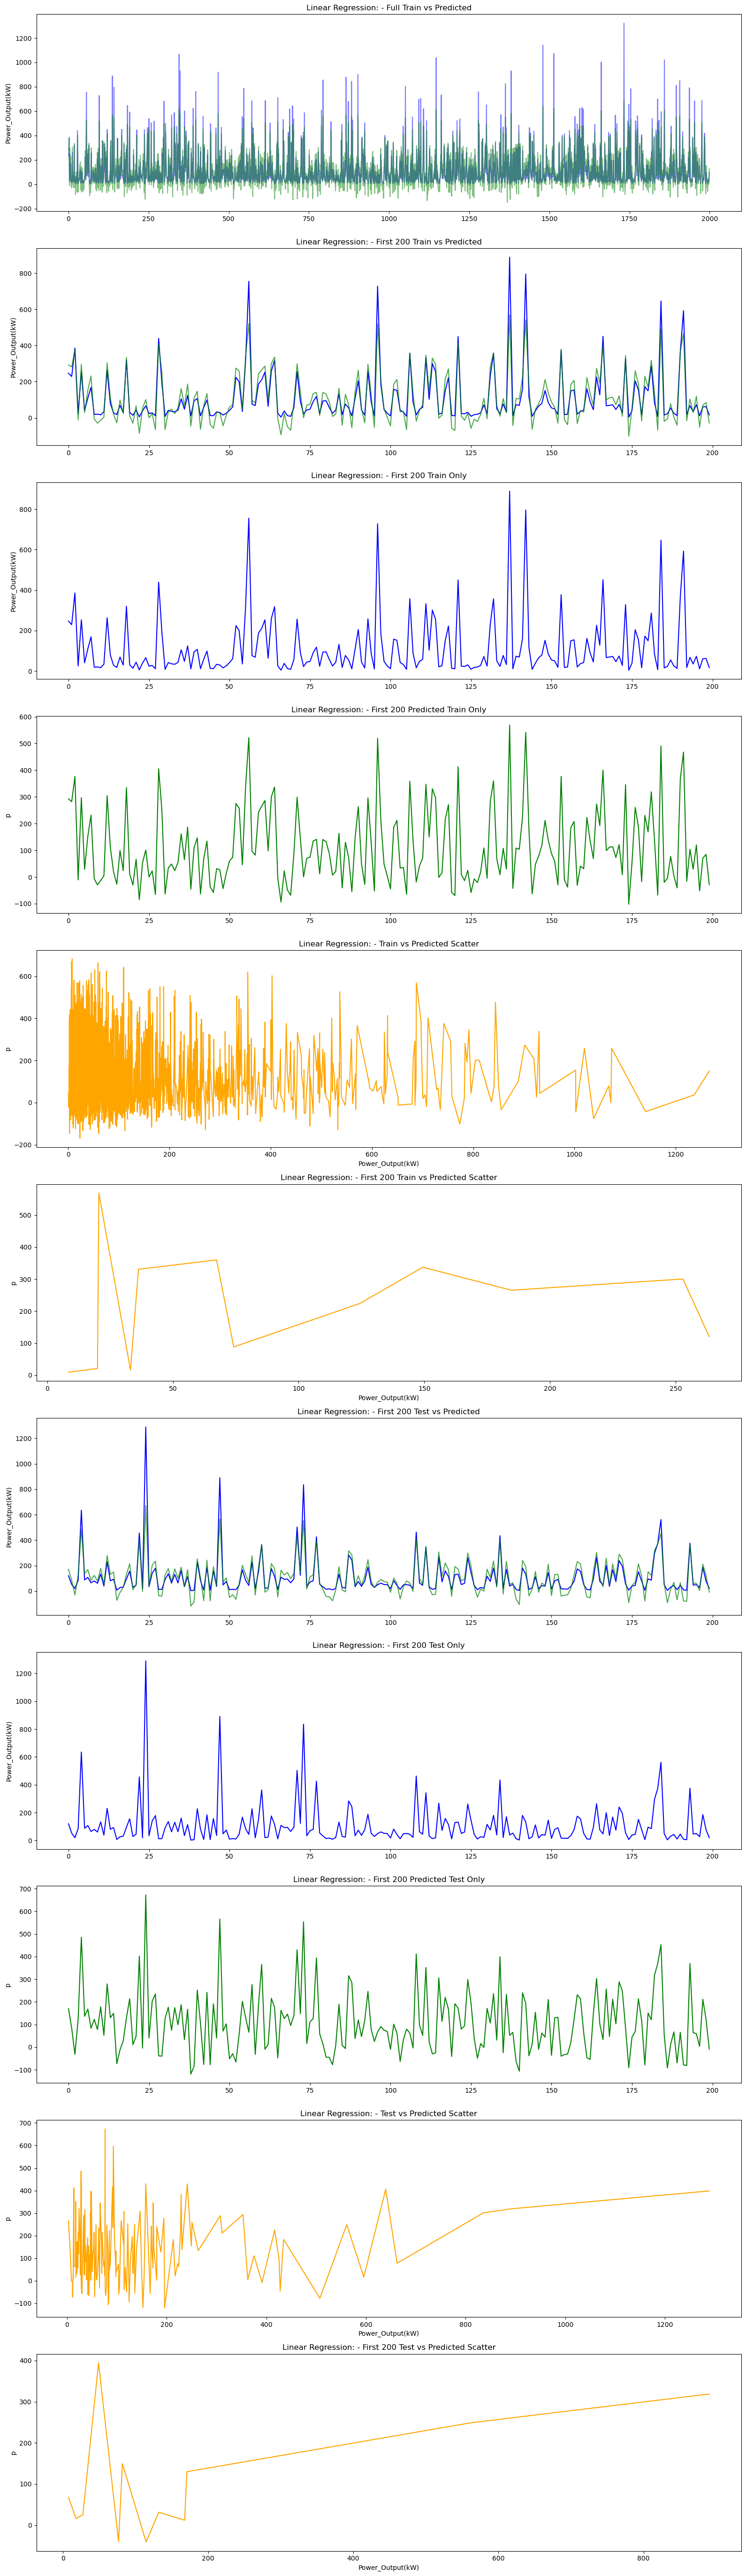

CPU times: total: 2.47 s
Wall time: 2.71 s


In [37]:
%%time
plot_model_predictions(
    y['Power_Output(kW)'],
    ypred_train.p,
    yt['Power_Output(kW)'],
    ypred_test.p,
    model_name="Linear Regression:"
)

# predicting output

In [38]:
def predict(model_path="wind_energy_prediction.pkl"):
    import joblib
    import numpy as np
    model = joblib.load(model_path)

    print("Enter the following values for prediction:")
    Wind_Speed=int(input("enter Wind_Speed(m/s): "))
    Temperature=int(input("enter Temperature(C): "))
    Humidity=int(input("enter Humidity(%): "))
    x=[[Wind_Speed,Temperature,Humidity]]
    Power_Output=model.predict(x)
    return Power_Output

In [39]:
# run below cell for pridecting values(output)

In [40]:
predict()

Enter the following values for prediction:


enter Wind_Speed(m/s):  56
enter Temperature(C):  54
enter Humidity(%):  54


array([[4831.89240582]])